In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('br-capes-colsucup-prog-2013a2016-2020-06-12_2016.csv',sep=';',encoding='latin1')

In [3]:
df.head()

,AN_BASE,NM_GRANDE_AREA_CONHECIMENTO,NM_AREA_CONHECIMENTO,NM_SUBAREA_CONHECIMENTO,NM_ESPECIALIDADE,CD_AREA_AVALIACAO,NM_AREA_AVALIACAO,CD_ENTIDADE_CAPES,CD_ENTIDADE_EMEC,SG_ENTIDADE_ENSINO,...,CD_CONCEITO_PROGRAMA,ANO_INICIO_PROGRAMA,AN_INICIO_CURSO,IN_REDE,SG_ENTIDADE_ENSINO_REDE,DS_SITUACAO_PROGRAMA,DT_SITUACAO_PROGRAMA,ID_ADD_FOTO_PROGRAMA_IES,ID_ADD_FOTO_PROGRAMA,DS_CLIENTELA_QUADRIENAL_2017
0,2016,CIÊNCIAS BIOLÓGICAS,PARASITOLOGIA,NÃO SE APLICA,NÃO SE APLICA,9,CIÊNCIAS BIOLÓGICAS III,10001018,699,UNIR,...,3,2001,2001/2005,NÃO,NaN,EM FUNCIONAMENTO,30DEC2013:00:00:00,121358,57437,AVALIAÇÃO
1,2016,MULTIDISCIPLINAR,INTERDISCIPLINAR,MEIO AMBIENTE E AGRÁRIAS,NÃO SE APLICA,45,INTERDISCIPLINAR,10001018,699,UNIR,...,4,1999,1999/2013,NÃO,NaN,EM FUNCIONAMENTO,13NOV2013:00:00:00,122262,58288,AVALIAÇÃO
2,2016,CIÊNCIAS HUMANAS,GEOGRAFIA,NÃO SE APLICA,NÃO SE APLICA,36,GEOGRAFIA,10001018,699,UNIR,...,4,2006,2006/2015,NÃO,NaN,EM FUNCIONAMENTO,19JUN2013:00:00:00,123170,59126,AVALIAÇÃO
3,2016,CIÊNCIAS SOCIAIS APLICADAS,ADMINISTRAÇÃO,NÃO SE APLICA,NÃO SE APLICA,27,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",10001018,699,UNIR,...,4,2006,2006,NÃO,NaN,EM FUNCIONAMENTO,30DEC2013:00:00:00,122595,58559,AVALIAÇÃO
4,2016,CIÊNCIAS HUMANAS,PSICOLOGIA,NÃO SE APLICA,NÃO SE APLICA,37,PSICOLOGIA,10001018,699,UNIR,...,3,2009,2009,NÃO,NaN,EM FUNCIONAMENTO,29MAY2013:00:00:00,121783,57820,AVALIAÇÃO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4186 entries, 0 to 4185
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   AN_BASE                        4186 non-null   int64 
 1   NM_GRANDE_AREA_CONHECIMENTO    4186 non-null   object
 2   NM_AREA_CONHECIMENTO           4186 non-null   object
 3   NM_SUBAREA_CONHECIMENTO        4186 non-null   object
 4   NM_ESPECIALIDADE               4186 non-null   object
 5   CD_AREA_AVALIACAO              4186 non-null   int64 
 6   NM_AREA_AVALIACAO              4186 non-null   object
 7   CD_ENTIDADE_CAPES              4186 non-null   int64 
 8   CD_ENTIDADE_EMEC               4186 non-null   object
 9   SG_ENTIDADE_ENSINO             4186 non-null   object
 10  NM_ENTIDADE_ENSINO             4186 non-null   object
 11  CS_STATUS_JURIDICO             4186 non-null   object
 12  DS_DEPENDENCIA_ADMINISTRATIVA  4186 non-null   object
 13  DS_

In [5]:
#Vendo como os estados desempenham 
estados=df.groupby('SG_UF_PROGRAMA').mean()['CD_CONCEITO_PROGRAMA']
estados=estados.apply(lambda x: round(x,2))
estados.sort_values(ascending=False)

SG_UF_PROGRAMA
SP    4.40
RJ    4.21
RS    4.10
DF    4.06
MG    4.03
SC    3.90
PE    3.82
CE    3.76
PR    3.71
PB    3.63
BA    3.62
RN    3.59
PA    3.53
GO    3.51
ES    3.51
AM    3.42
SE    3.42
MS    3.41
AL    3.41
MT    3.37
AP    3.25
RO    3.25
MA    3.24
TO    3.23
PI    3.20
AC    3.20
RR    3.14
Name: CD_CONCEITO_PROGRAMA, dtype: float64

In [6]:
#Vendo como as centro de pesquisas desempenham
unis=df[df['SG_UF_PROGRAMA']=='RJ']
unis=unis.groupby('SG_ENTIDADE_ENSINO').mean()['CD_CONCEITO_PROGRAMA']
unis=unis.apply(lambda x: round(x,2))
unis.sort_values(ascending=False)

SG_ENTIDADE_ENSINO
INCA          6.00
LNCC          6.00
IMPA          5.50
CBPF          5.50
SBM           5.00
PUC-RIO       4.88
UFRJ          4.79
FGV/RJ        4.67
FIOCRUZ       4.60
ON            4.50
UERJ          4.33
UNESA         4.20
UENF          4.07
IBMEC         4.00
IEAPM         4.00
ENCE          4.00
INPI          4.00
JBRJ          4.00
ECEME         4.00
IRD           4.00
UNIGRANRIO    4.00
UNIFA         4.00
UFF           3.83
UVA           3.80
UNIVERSO      3.67
UFRRJ         3.66
IME           3.62
UNIRIO        3.55
UNIFOA        3.50
UNISUAM       3.50
INMETRO       3.50
UCAM          3.43
CEFET/RJ      3.38
IFRJ          3.33
UCP/RJ        3.25
INC           3.00
ESPM          3.00
CESGRANRIO    3.00
CPII          3.00
USS           3.00
EGN           3.00
MAST          3.00
UEZO          3.00
FCRB          3.00
INTO          3.00
USU           3.00
FUCAPE-RJ     3.00
IPHAN         3.00
IEN           3.00
IFF           3.00
UNIPLI        2.00
Name: CD_CON

In [7]:
def conceito_capes(universidade:str):
    '''Faz um gráfico de barras do conceito CAPES dos conceitos dos PPG de uma universidade.'''
    uni=df[df['SG_ENTIDADE_ENSINO']==universidade]
    sns.countplot(x='CD_CONCEITO_PROGRAMA',data=uni,color='black')
    plt.title('Coceito CAPES de PPG da '+str(universidade))
    plt.xlabel('Conceito Capes do Programa')
    plt.ylabel('Contagem')

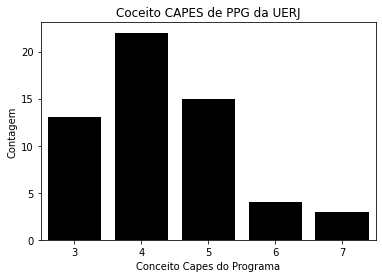

In [8]:
conceito_capes('UERJ')

In [9]:
df[df['SG_ENTIDADE_ENSINO']=='UERJ'].query("CD_CONCEITO_PROGRAMA ==4")

,AN_BASE,NM_GRANDE_AREA_CONHECIMENTO,NM_AREA_CONHECIMENTO,NM_SUBAREA_CONHECIMENTO,NM_ESPECIALIDADE,CD_AREA_AVALIACAO,NM_AREA_AVALIACAO,CD_ENTIDADE_CAPES,CD_ENTIDADE_EMEC,SG_ENTIDADE_ENSINO,...,CD_CONCEITO_PROGRAMA,ANO_INICIO_PROGRAMA,AN_INICIO_CURSO,IN_REDE,SG_ENTIDADE_ENSINO_REDE,DS_SITUACAO_PROGRAMA,DT_SITUACAO_PROGRAMA,ID_ADD_FOTO_PROGRAMA_IES,ID_ADD_FOTO_PROGRAMA,DS_CLIENTELA_QUADRIENAL_2017
1373,2016,"LINGÜÍSTICA, LETRAS E ARTES",LETRAS,LITERATURA BRASILEIRA,NÃO SE APLICA,41,LETRAS / LINGUÍSTICA,31004016,547,UERJ,...,4,1988,1988/1993,NÃO,NaN,EM FUNCIONAMENTO,07AUG2010:00:00:00,119696,55945,AVALIAÇÃO
1375,2016,CIÊNCIAS SOCIAIS APLICADAS,DIREITO,NÃO SE APLICA,NÃO SE APLICA,26,DIREITO,31004016,547,UERJ,...,4,1991,1991/1995,NÃO,NaN,EM FUNCIONAMENTO,01JUN2010:00:00:00,123976,59856,AVALIAÇÃO
1377,2016,CIÊNCIAS BIOLÓGICAS,BIOLOGIA GERAL,NÃO SE APLICA,NÃO SE APLICA,6,CIÊNCIAS BIOLÓGICAS I,31004016,547,UERJ,...,4,1993,1993/2003,NÃO,NaN,EM FUNCIONAMENTO,01JUN2010:00:00:00,119581,55867,AVALIAÇÃO
1378,2016,CIÊNCIAS BIOLÓGICAS,MICROBIOLOGIA,NÃO SE APLICA,NÃO SE APLICA,9,CIÊNCIAS BIOLÓGICAS III,31004016,547,UERJ,...,4,1994,1994/2006,NÃO,NaN,EM FUNCIONAMENTO,20MAR2014:00:00:00,121837,57870,AVALIAÇÃO
1382,2016,CIÊNCIAS EXATAS E DA TERRA,GEOCIÊNCIAS,NÃO SE APLICA,NÃO SE APLICA,5,GEOCIÊNCIAS,31004016,547,UERJ,...,4,1995,1995/2001,NÃO,NaN,EM FUNCIONAMENTO,09AUG2012:00:00:00,121727,57785,AVALIAÇÃO
1385,2016,CIÊNCIAS HUMANAS,PSICOLOGIA,TRATAMENTO E PREVENÇÃO PSICOLÓGICA,NÃO SE APLICA,37,PSICOLOGIA,31004016,547,UERJ,...,4,1998,1998/2007,NÃO,NaN,EM FUNCIONAMENTO,10OCT2012:00:00:00,119717,55927,AVALIAÇÃO
1389,2016,CIÊNCIAS SOCIAIS APLICADAS,ECONOMIA,NÃO SE APLICA,NÃO SE APLICA,28,ECONOMIA,31004016,547,UERJ,...,4,2003,2003/2014,NÃO,NaN,EM FUNCIONAMENTO,13JUN2012:00:00:00,122364,58368,AVALIAÇÃO
1391,2016,ENGENHARIAS,ENGENHARIA CIVIL,NÃO SE APLICA,NÃO SE APLICA,10,ENGENHARIAS I,31004016,547,UERJ,...,4,2003,2003/2012,NÃO,NaN,EM FUNCIONAMENTO,16APR2013:00:00:00,121973,58024,AVALIAÇÃO
1393,2016,CIÊNCIAS DA SAÚDE,MEDICINA,NÃO SE APLICA,NÃO SE APLICA,15,MEDICINA I,31004016,547,UERJ,...,4,2002,2002/2002,NÃO,NaN,EM FUNCIONAMENTO,25APR2013:00:00:00,121049,57131,AVALIAÇÃO
1395,2016,ENGENHARIAS,ENGENHARIA QUÍMICA,NÃO SE APLICA,NÃO SE APLICA,12,ENGENHARIAS II,31004016,547,UERJ,...,4,2004,2004/2012,NÃO,NaN,EM FUNCIONAMENTO,20SEP2012:00:00:00,122292,58304,AVALIAÇÃO


Text(0.5, 1.0, 'Ano de fundação x CONCEITO CAPES')

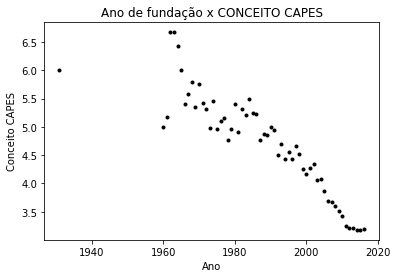

In [10]:
#ano de fundação versus conceito

ano=df.groupby('ANO_INICIO_PROGRAMA').mean()['CD_CONCEITO_PROGRAMA']
ano=ano.apply(lambda x: round(x,2))
ano.sort_values(ascending=False)
plt.scatter(ano.index,ano.values,color='black',marker='.')
plt.xlabel('Ano')
plt.ylabel('Conceito CAPES')
plt.title('Ano de fundação x CONCEITO CAPES')

In [11]:
from Reglin import *

In [12]:
reglin2(ano.index,ano.values)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     243.3
Date:                Fri, 20 Nov 2020   Prob (F-statistic):           4.89e-22
Time:                        16:17:10   Log-Likelihood:                -26.442
No. Observations:                  58   AIC:                             56.88
Df Residuals:                      56   BIC:                             61.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         92.9730      5.657     16.435      0.0